# Exercise 5: Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We are using again the wine-data from Exercise 4, but now building a neural network for prediction.

In [2]:
# The code snippet below is responsible for downloading the dataset to
# Google. You can directly download the file using the link
# if you work with a local anaconda setup

# Temporarily replaced link as the ML dataset archive seems to be down
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
#wget https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-white.csv

In [3]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [6.100e+00 2.200e-01 4.900e-01 1.500e+00 5.100e-02 1.800e+01 8.700e+01
 9.928e-01 3.300e+00 4.600e-01 9.600e+00]
Quality: 5.0


# Homework

The goal is to implement the training of a neural network with one input layer, one hidden layer and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W,b,W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one example to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [4]:
# You can use this implementation of the ReLu activation function
def relu(rx):
    return np.maximum(rx, 0)

In [5]:
# Initialise weights with suitable random distributions
hidden_nodes = 3
n_inputs = 11
W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)


(3, 11)


In [6]:
def dnn(xd,Wd,bd,Wpd,bpd):
    # TODO Calculate and return network output of forward pass

    Xp = np.zeros(hidden_nodes)

    Xp = relu(np.matmul(Wd,xd) + bd)

    return (np.matmul(Wpd,Xp) + bpd)

In [7]:
def update_weights(xu,yu, Wu, bu, Wpu, bpu):
    
    learning_rate = 0.01

    # TODO: Calculate the network output (use the function dnn defined above)

    yp = dnn(xu, Wu, bu, Wpu, bpu)
    # TODO: Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    # You might need these numpy functions:
    # np.dot, np.outer, np.heaviside
    # Hint: Use .shape and print statements to make sure all operations
    # do what you want them to 
    gradient_bp = 0
    gradient_bp = 2 * (yp - yu)
    
    gradient_b = np.zeros(hidden_nodes)
    gradient_Wp = np.zeros(hidden_nodes)
    for i in range(hidden_nodes):
        gradient_b[i] = 2 * (yp - yu) * Wpu[i] * np.heaviside(np.matmul(Wu[i,:], x) + bu[i], 1)
        gradient_Wp[i] = 2 * (yp - yu) * relu(np.matmul(Wu[i,:], x) + bu[i])
    
    gradient_W = np.zeros((hidden_nodes, 11))
    for i in range(hidden_nodes):
        for k in range(11):
            gradient_W[i,k] = 2* (yp - yu) * Wpu[i] * np.heaviside(np.matmul(Wu[i,:], x) + bu[i],1) * x[k]

    # TODO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient
    Wu = Wu - learning_rate * gradient_W 
    bu = bu - learning_rate * gradient_b 
    Wpu = Wpu - learning_rate * gradient_Wp 
    bpu = bpu - learning_rate * gradient_bp 
    return Wu, bu, Wpu, bpu # no return value needed, you can modify the weights in-place

# Training loop and evaluation below

Epoch: 0 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 1 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 2 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 3 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 4 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 5 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 6 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 7 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 8 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Epoch: 9 Train Loss: 0.7947955133457367 Test Loss: 0.7679280084706059
Best loss: 0.7679280084706059 Final loss: 0.7679280084706059
Correlation coefficient: -0.04611002449042679


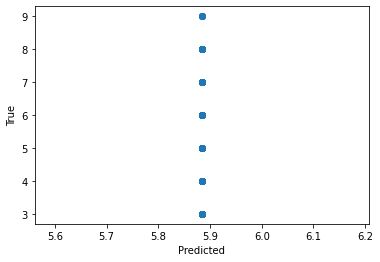

In [8]:
# The code below implements the training.
# If you correctly build dnn and update_weights above, 
# you should not need to change anything below. 
# (Apart from increasing the number of epochs)

train_losses = []
test_losses = []

# how many epochs to train
n_epochs = 10 # This will just train for one epoch. You will want a higher number

#print(W,b,Wp,bp)

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W, b, Wp, bp = update_weights(x,y,W,b,Wp,bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
#print(W,b,Wp,bp)
    
# Prepare scatter plot


y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
